In [111]:
#Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

In [112]:
# Chargement des données du dataset (kc_house_data)
kc = pd.read_csv('data/kc_house_data.csv')
# afficher le dataset des 5 premieres lignes
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [93]:
# les variable du dataset dans les differentes colonnes
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [113]:
# division de la date en année, moi et jour
dateTime=pd.DatetimeIndex(kc.date)
kc['year']=dateTime.year
kc['month']=dateTime.month
kc['day']=dateTime.day
kc.drop(columns=['date'],inplace=True)
kc.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month', 'day'],
      dtype='object')

In [114]:
# afficher la dataset
kc.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


Regression Lineaire

In [115]:
# extraire x et y de nos données
x=kc["bedrooms"].values[:,np.newaxis]
y=kc["price"].values

In [116]:
 # diviser opte pour 20% test et 80% 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.80,random_state=20)

In [117]:
# modèle de régression linéaire
model=LinearRegression()
# ajustement des données d'entraînement
model.fit(x_train,y_train)  
# Test de la performance de notre modèle
predicted=model.predict(x_test)


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 121654555227.9469
R squared 0.0951290081687114


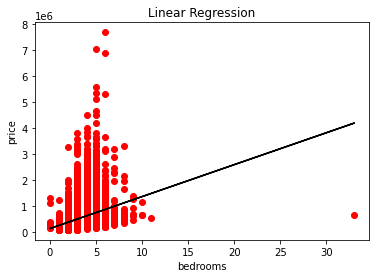

In [118]:
# Tracer le model de regresion lineaire
plt.scatter(x, y, color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("bedrooms")
plt.plot(x,model.predict(x),color="k")
plt.show()

La regression multi-Lineaire

In [119]:
x=kc[["bedrooms","yr_built"]]  #we have more than one input
y=kc["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 113639694726.18771
R squared 0.0960712149891152


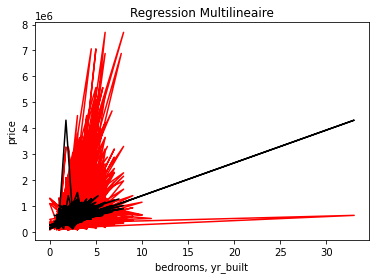

In [104]:
plt.plot(x, y, color="r")
plt.title("Regression Multilineaire")
plt.ylabel("price")
plt.xlabel("bedrooms, yr_built")
plt.plot(x,model.predict(x),color="k")
plt.show()

 La Regression polynomiale

In [120]:
x= kc[["bedrooms", "bathrooms"]]
y= kc["price"].values

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  191218457031.0119
R squared:  -0.5210166478550626


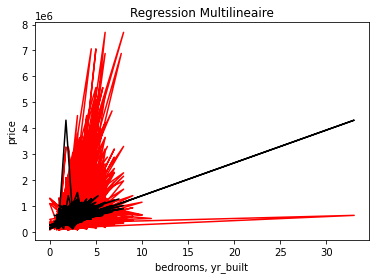

In [122]:
plt.plot(x, y, color="r")
plt.title("Regression Multilineaire")
plt.ylabel("price")
plt.xlabel("bedrooms, yr_built")
plt.plot(x,model.predict(x),color="k")
plt.show()